In [1]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import tables

In [20]:
path = '/home/douwei/JP_python/version4/recon/0210'
path_list=os.listdir(path)
E_total = []
taud_total = []
x_total = []
y_total = []
z_total = []
for filename in path_list:
    if os.path.splitext(filename)[1] == '.h5':
        try:
            h = tables.open_file(os.path.join(path,filename),'r')
            recondata = h.root.Recon
            E = recondata[:]['E_sph']
            E_total = np.hstack((E_total, E))
            taud = recondata[:]['tau_d']
            taud_total = np.hstack((taud_total, taud))
            x = recondata[:]['x_sph']
            x_total = np.hstack((x_total, x))
            y = recondata[:]['y_sph']
            y_total = np.hstack((y_total, y))
            z = recondata[:]['z_sph']
            z_total = np.hstack((z_total, z))
        except:
            pass
        h.close()

(1305571,) (1305571,)
0
[]


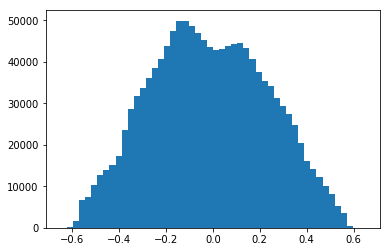

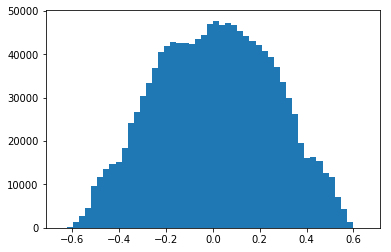

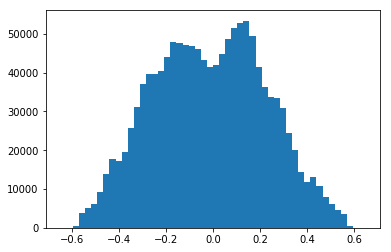

In [69]:
print(x_total.shape, np.isnan(x_total).shape)
print(np.sum(np.isnan(x_total)))
print(x_total[np.isnan(x_total)])
E_new = E_total[~np.isnan(E_total)]
x_new = x_total[~np.isnan(x_total)]
y_new = y_total[~np.isnan(y_total)]
z_new = z_total[~np.isnan(z_total)]
taud_new = taud_total[~np.isnan(taud_total)]
taud_new = taud_total[~np.isnan(E_total)]
plt.figure(num=1)
plt.hist(x_new,bins=50)
plt.figure(num=2)
plt.hist(y_new,bins=50)
plt.figure(num=3)
plt.hist(z_new,bins=50)
plt.show()

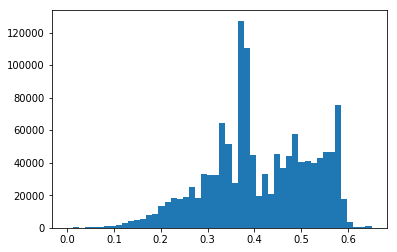

In [27]:
plt.figure(num=1)
plt.hist(np.sqrt(x_new**2+y_new**2+z_new**2),bins=50)
plt.show()

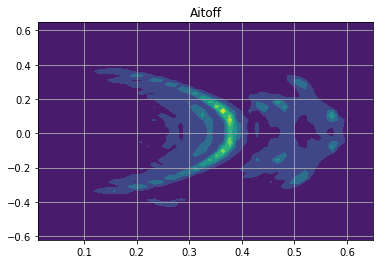

In [77]:
plt.figure()
#plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.grid(True)

r1 = np.sqrt(x_new**2 + y_new**2)
H1, xedges, yedges = np.histogram2d(r1, z_new, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))

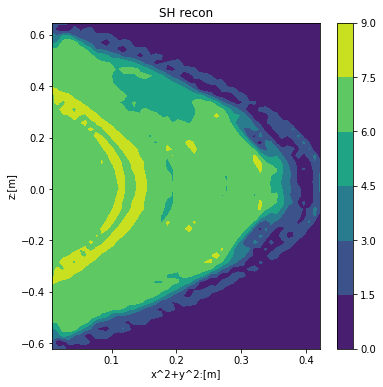

In [47]:
plt.figure(figsize = (6,6))

r1 = x_new**2 + y_new**2
H1, xedges, yedges = np.histogram2d(r1, z_new, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.log(np.transpose(H1)+1))
plt.xlabel('x^2+y^2:[m]')
plt.ylabel('z:[m]')
plt.colorbar()
plt.title('SH recon')
plt.show()

(131, 7, 6)
/home/douwei/Recon-1ton/calib/logs/c0.8.h5
/home/douwei/Recon-1ton/calib/logs/c1.0.h5
/home/douwei/Recon-1ton/calib/logs/c1.2.h5
/home/douwei/Recon-1ton/calib/logs/c1.5.h5
/home/douwei/Recon-1ton/calib/logs/c1.8.h5
/home/douwei/Recon-1ton/calib/logs/c2.0.h5


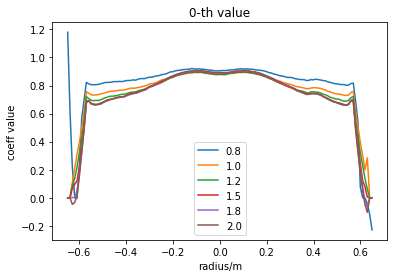

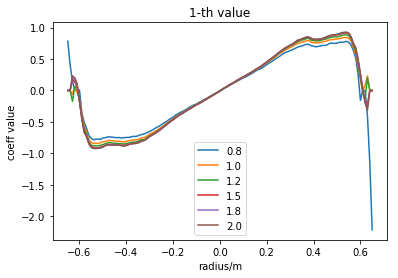

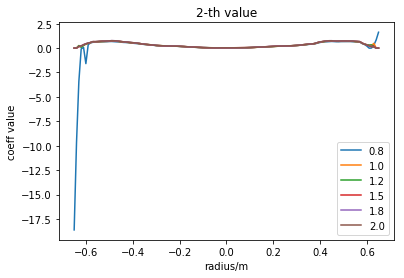

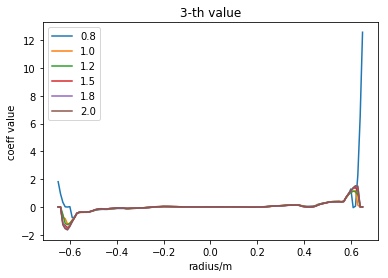

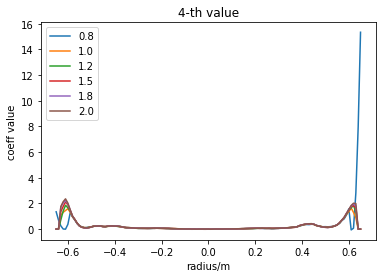

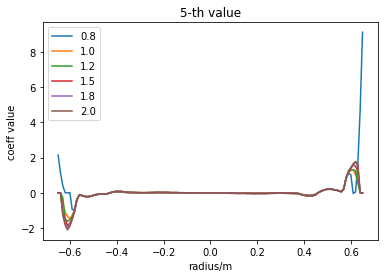

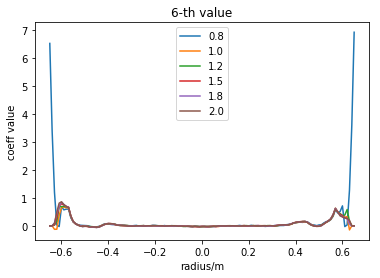

In [36]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import os
import tables

def coeff3d():
    logs = ['0.8','1.0','1.2','1.5','1.8','2.0']
    radius = np.arange(-0.65,0.66,0.01)
    new_cell = np.zeros([len(radius), 7, len(logs)])
    print(new_cell.shape)
    for i in range(len(logs)):
        filename = '/home/douwei/Recon-1ton/calib/logs/c' + logs[i] + '.h5'
        print(filename)
        h = tables.open_file(filename,'r')
        recondata = h.root.coeff
        x_axis = h.root.x
        coeff_x = np.array(recondata[:])
        x = np.array(x_axis[:])
        for j in np.arange(len(coeff_x[0,])):
            if i == 0:
                coeff_x[0,0] = 0
            if j == 0:
                coeff_x[:,0] = coeff_x[:,0] - np.log(eval(logs[i]))

            x_left1 = np.min(x)-0.01
            x_left2 = np.min(x)-0.02
            x_left3 = -1
            
            x_right1 = np.max(x)+0.01
            x_right2 = np.max(x)+0.02
            x_right3 = 1
            xx = np.hstack((x_left3, x_left2, x_left1, x[:,0], x_right1, x_right2, x_right3))
            yy = np.hstack((0, 0, 0, coeff_x[:,j], 0, 0, 0))
            f = interpolate.interp1d(xx, yy, kind='cubic')            
            new_cell[:,j,i] = f(radius)
    return logs, radius, new_cell

if __name__ == '__main__':
    logs, radius, new_cell = coeff3d()
    for i in range(len(new_cell[0,:,0])):
        plt.figure(i)
        plt.plot(radius, new_cell[:,i,:])
        
        plt.xlabel('radius/m')
        plt.ylabel('coeff value')
        plt.legend(['0.8','1.0','1.2','1.5','1.8','2.0'])
        plt.title((str(i) + '-th value'))
plt.show()

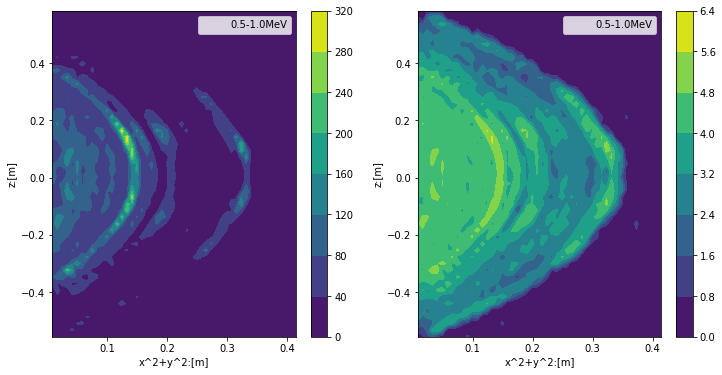

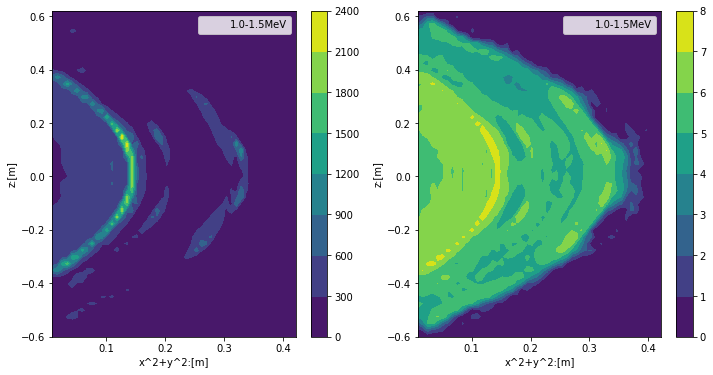

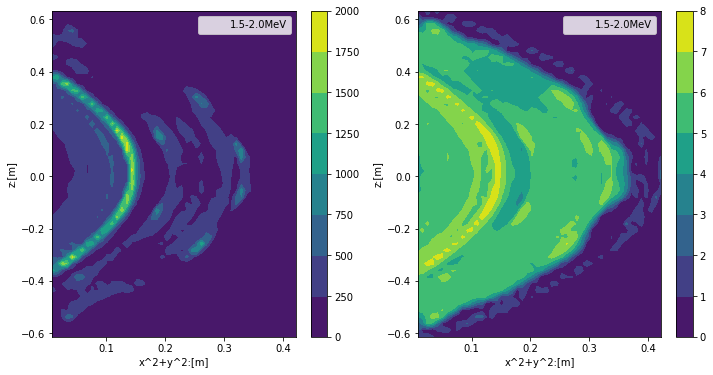

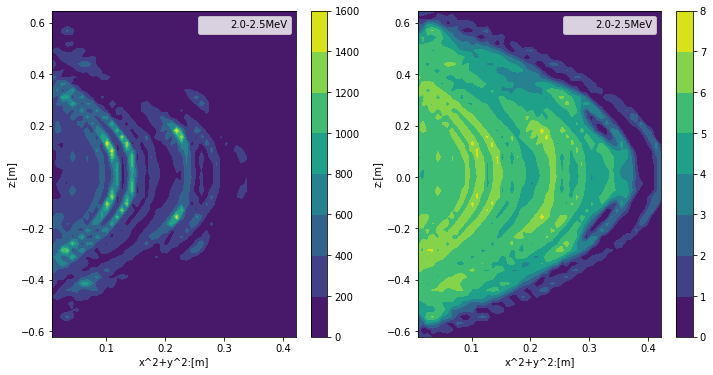

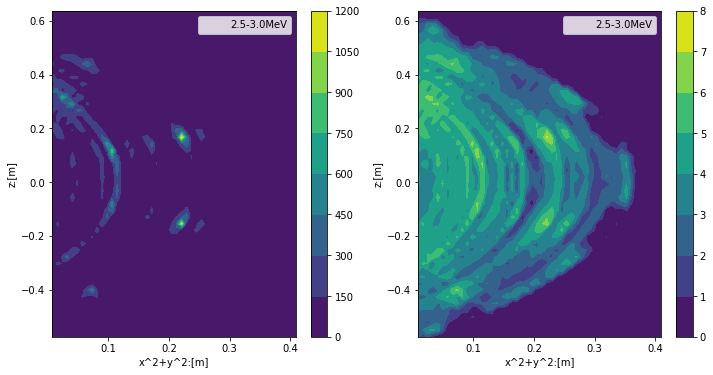

In [76]:
E = np.arange(0.5,3,0.5)
for i in np.arange(np.size(E)):
    plt.figure(figsize = (12,6), num = i)
    r1 = x_new**2 + y_new**2
    H1, xedges, yedges = np.histogram2d(r1[(E_new<E[i]+0.5) & (E_new>E[i])],\
                                        z_new[(E_new<E[i]+0.5) & (E_new>E[i])], bins=50)
    X, Y = np.meshgrid(xedges[1:],yedges[1:])
    plt.subplot(1,2,1)
    plt.contourf(X,Y,np.transpose(H1))
    plt.xlabel('x^2+y^2:[m]')
    plt.ylabel('z:[m]')
    plt.legend([str(E[i])+ '-' + str(E[i]+0.5)+'MeV'])
    plt.colorbar()
    plt.subplot(1,2,2)
    plt.contourf(X,Y,np.log(np.transpose(H1)+1))
    plt.xlabel('x^2+y^2:[m]')
    plt.ylabel('z:[m]')
    plt.legend([str(E[i])+ '-' + str(E[i]+0.5)+'MeV'])
    plt.colorbar()
plt.show()

(1305571,) (1305571,)


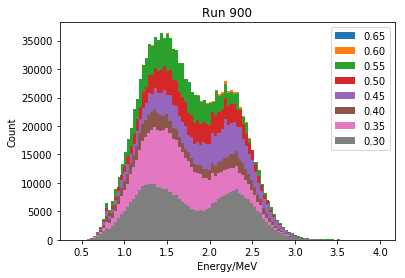

In [74]:
r = np.sqrt(x_new**2+y_new**2+z_new**2)
print(x_new.shape, E_new.shape)
E = E_new
import matplotlib.pyplot as plt
plt.figure(1)
for i in np.arange(0.7,0.3,-0.05):
    plt.hist(E_new[(r<i) & (E_new<4)],bins=100)
plt.legend(["0.65","0.60","0.55","0.50","0.45","0.40","0.35","0.30"])
plt.xlabel('Energy/MeV')
plt.ylabel('Count')
plt.title('Run 900')
plt.show()

/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/home/orv/gentoo/usr/lib64/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


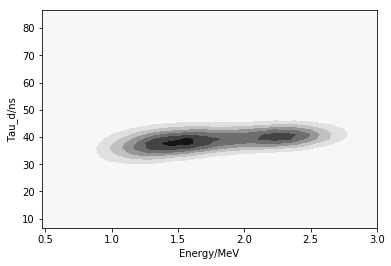

In [64]:
E_new = E_total[(~np.isnan(E_total)) & (~np.isnan(taud_total)) & (E_total<3)]
taud_new = taud_total[(~np.isnan(E_total)) & (~np.isnan(taud_total))& (E_total<3)]
H, xedges, yedges = np.histogram2d(E_new, taud_new, bins=50)

X, Y = np.meshgrid(xedges[1:],yedges[1:])

plt.figure(2)
plt.contourf(X,Y,np.transpose(H),cmap='Greys')
plt.xlabel('Energy/MeV')
plt.ylabel('Tau_d/ns')
plt.show()


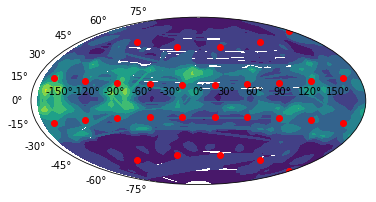

In [92]:
def ReadPMT():
    f = open(r"./PMT1t.txt")
    line = f.readline()
    data_list = [] 
    while line:
        num = list(map(float,line.split()))
        data_list.append(num)
        line = f.readline()
    f.close()
    PMT_pos = np.array(data_list)
    return PMT_pos
PMT_pos = ReadPMT()

r1 = np.sqrt(x_new**2 + y_new**2 + z_new**2)

theta1 = np.arccos(z_new/(r1+1e-4))

phi1 = np.arctan(y_new/(x_new+1e-4)) + (x_new>0)*np.pi


fig = plt.figure()
plt.subplot(1,1,1,projection="aitoff")
# H1, xedges, yedges = np.histogram2d(phi1[(r>0.35)&(r<0.4)] - np.pi/2, theta1[(r>0.35)&(r<0.4)] - np.pi/2, bins=50)
H1, xedges, yedges = np.histogram2d(phi1[(r>0.5)] - np.pi/2, theta1[(r>0.5)] - np.pi/2, bins=50)
X, Y = np.meshgrid(xedges[1:],yedges[1:])
plt.contourf(X,Y,np.transpose(H1))
plt.scatter(np.arctan(PMT_pos[:,1]/(PMT_pos[:,0]+1e-3)) + (PMT_pos[:,0]>=0)*np.pi - np.pi/2, \
            np.arccos(PMT_pos[:,2]/np.sqrt(np.sum(PMT_pos**2,axis=1))) - np.pi/2,\
           c='red')
plt.show()